<a href="https://colab.research.google.com/github/alwaysalearner1234/ML02/blob/main/Support_Vector_Machine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machine Tutorial Using Python Sklearn**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

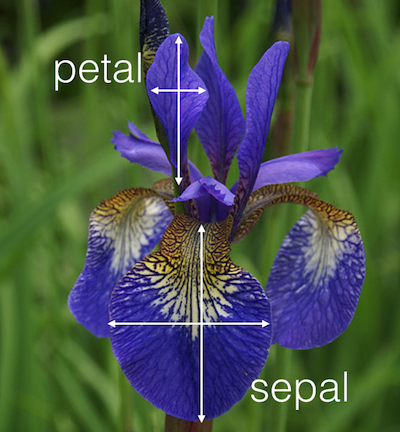

In [ ]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df[45:55]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Sepal length vs Sepal Width (Setosa vs Versicolor)



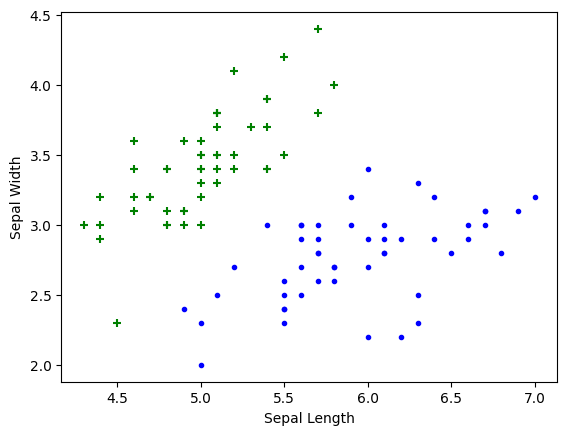

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load dataset
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv"
df = pd.read_csv(url)

# Features & target
inputs = df[['Pclass', 'Sex', 'Age', 'Fare']]
target = df['Survived']

# Encode 'Sex'
inputs['Sex'] = inputs['Sex'].map({'male':1, 'female':0})

# Handle missing values
inputs['Age'].fillna(inputs['Age'].median(), inplace=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Export tree to DOT format
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=inputs.columns,
    class_names=["Not Survived", "Survived"],
    filled=True, rounded=True, special_characters=True
)

# Generate PNG
graph = graphviz.Source(dot_data)
graph.render("titanic_tree", format="png", cleanup=True)  # saves titanic_tree.png


/tmp/ipython-input-139361010.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex'] = inputs['Sex'].map({'male':1, 'female':0})
/tmp/ipython-input-139361010.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['Age'].fillna(inputs['Age'].median(), inplace=True)
/tmp/ip

'titanic_tree.png'

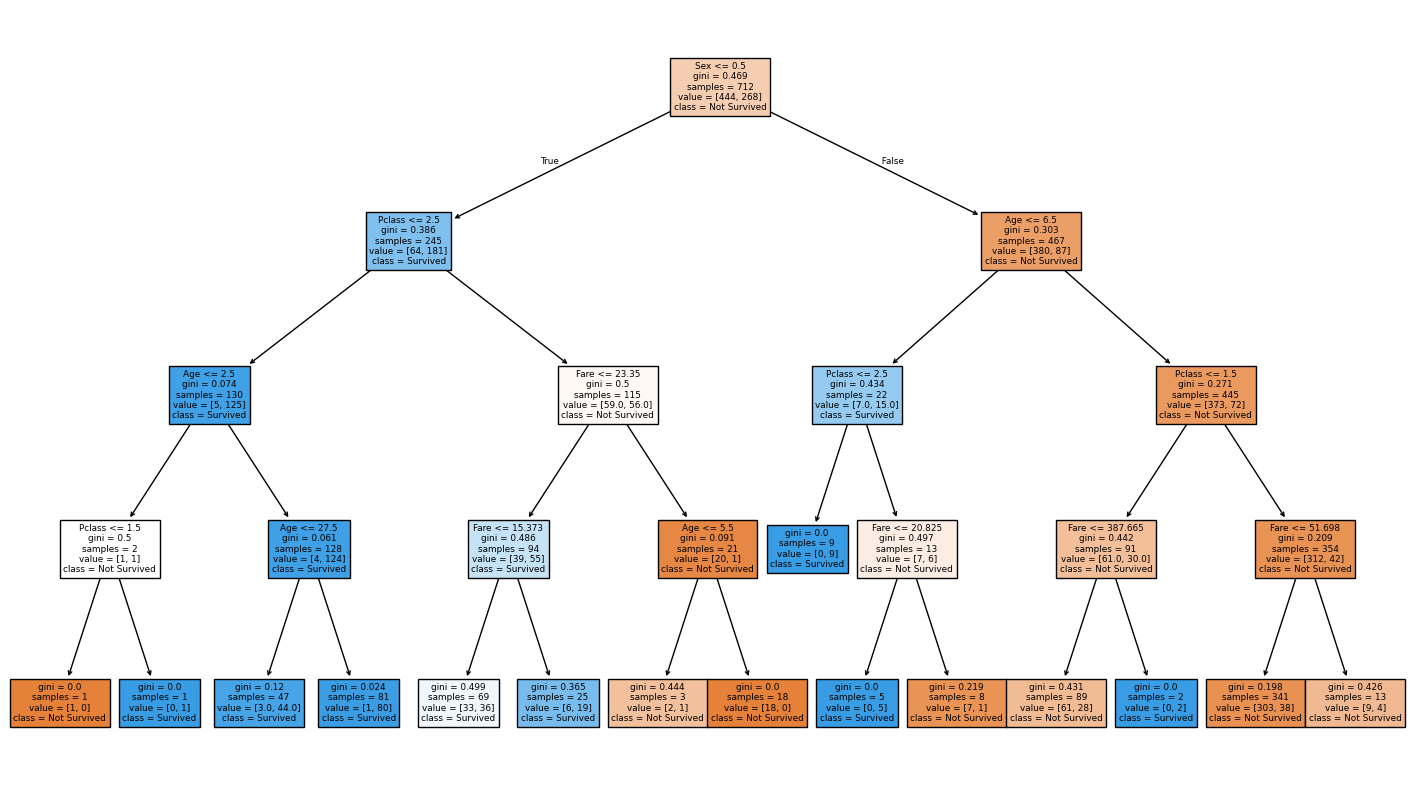

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(model, feature_names=inputs.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.savefig("titanic_tree.png")   # saves as PNG
plt.savefig("titanic_tree.pdf")   # saves as PDF
plt.show()


In [ ]:
pip install graphviz


In [ ]:
import graphviz
print(graphviz.__version__)


0.21


Training Accuracy: 0.8384831460674157
Testing Accuracy: 0.7988826815642458


/tmp/ipython-input-2832502725.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex'] = inputs['Sex'].map({'male':1, 'female':0})
/tmp/ipython-input-2832502725.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['Age'].fillna(inputs['Age'].median(), inplace=True)
/tmp/

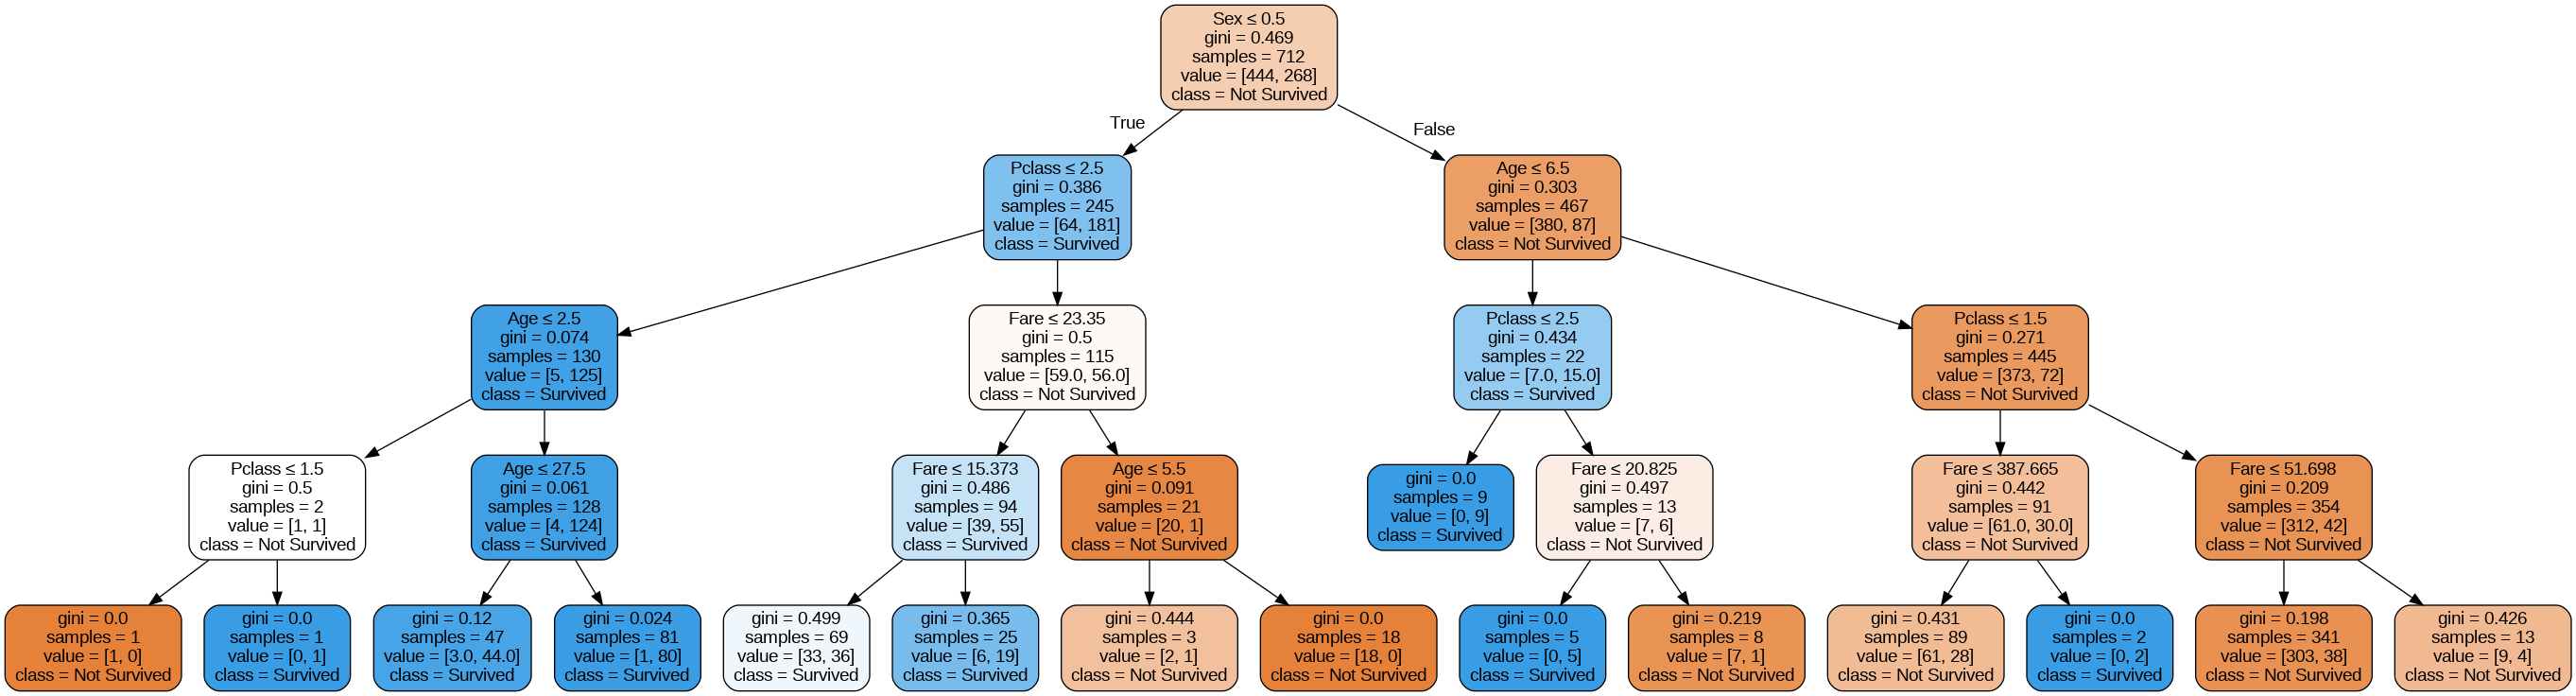

In [ ]:
# Step 0: Install required packages (run this cell only if not installed)
!pip install graphviz pandas scikit-learn matplotlib --quiet

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt
from IPython.display import Image

# Step 2: Load Titanic dataset
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv"
df = pd.read_csv(url)

# Step 3: Select features and target
inputs = df[['Pclass', 'Sex', 'Age', 'Fare']]
target = df['Survived']

# Encode 'Sex' column: male=1, female=0
inputs['Sex'] = inputs['Sex'].map({'male':1, 'female':0})

# Fill missing Age values with median
inputs['Age'].fillna(inputs['Age'].median(), inplace=True)

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 6: Print accuracy scores
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

# Step 7: Export tree to DOT format
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=inputs.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Step 8: Create Graphviz source and render PNG
graph = graphviz.Source(dot_data)
graph.render("titanic_tree", format="png", cleanup=True)

# Step 9: Display tree image in notebook
Image(filename='titanic_tree.png')


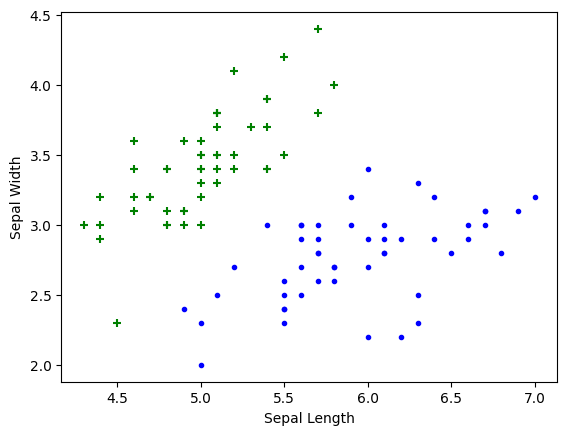

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')


Petal length vs Pepal Width (Setosa vs Versicolor)

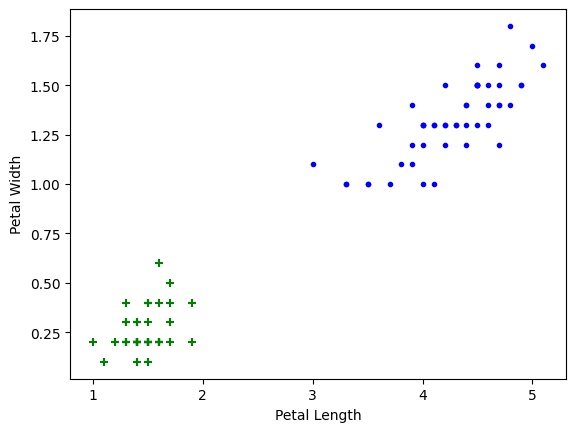

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [ ]:
X = df.drop(['Survived'], axis='columns')
y = df['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
len(X_train)


712

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Widegren, Mr. Carl/Charles Peter'

In [ ]:
import pandas as pd

df = pd.read_csv("titanic.csv")  # replace with your file path
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)


/tmp/ipython-input-3144285523.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3144285523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
model.score(X_test, y_test)


ValueError: could not convert string to float: "O'Connor, Mr. Maurice"

In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


AttributeError: 'SVC' object has no attribute 'support_vectors_'

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVC
model = SVC()
model.fit(X_train, y_train)

# Predict (after fitting)
print(model.predict([[4.8, 3.0, 1.5, 0.3]]))


[0]


Tune parameters

1. Regularization (C)

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

2. Gamma



In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

1.0

3. Kernel



In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
model_linear_kernal.score(X_test, y_test)


1.0

Exercise

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

Measure accuracy of your model using different kernels such as rbf and linear.
Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
Use 80% of samples as training data size

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])


Number of samples: 1797
Number of features: 64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)


In [ ]:
kernels = ['linear', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")


Accuracy with linear kernel: 0.9778
Accuracy with rbf kernel: 0.9917


In [ ]:
# Try multiple combinations
C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 0.001, 0.01, 0.1, 1]

best_acc = 0
best_params = {}

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_params = {'C': C, 'gamma': gamma}

print("Best RBF SVM Accuracy:", best_acc)
print("Best Parameters:", best_params)


Best RBF SVM Accuracy: 0.9944444444444445
Best Parameters: {'C': 10, 'gamma': 'scale'}


In [ ]:
final_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_model.fit(X_train, y_train)
final_acc = accuracy_score(y_test, final_model.predict(X_test))
print("Final Model Accuracy:", final_acc)


Final Model Accuracy: 0.9944444444444445


Accuracy with linear kernel: 0.9778
Accuracy with rbf kernel: 0.9917

Best RBF SVM Accuracy: 0.9944444444444445
Best Parameters: {'C': 10, 'gamma': 'scale'}
Final Model Accuracy: 0.9944444444444445


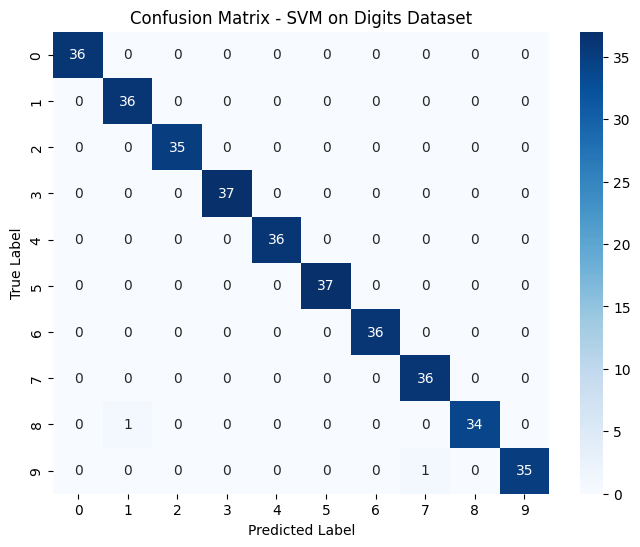

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

# Try different kernels
kernels = ['linear', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")

# Hyperparameter tuning
C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 0.001, 0.01, 0.1, 1]

best_acc = 0
best_params = {}

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_params = {'C': C, 'gamma': gamma}

print("\nBest RBF SVM Accuracy:", best_acc)
print("Best Parameters:", best_params)

# Final model
final_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)

# Final accuracy
final_acc = accuracy_score(y_test, final_y_pred)
print("Final Model Accuracy:", final_acc)

# Confusion Matrix
cm = confusion_matrix(y_test, final_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM on Digits Dataset")
plt.show()


Final Model Accuracy: 0.8583333333333333


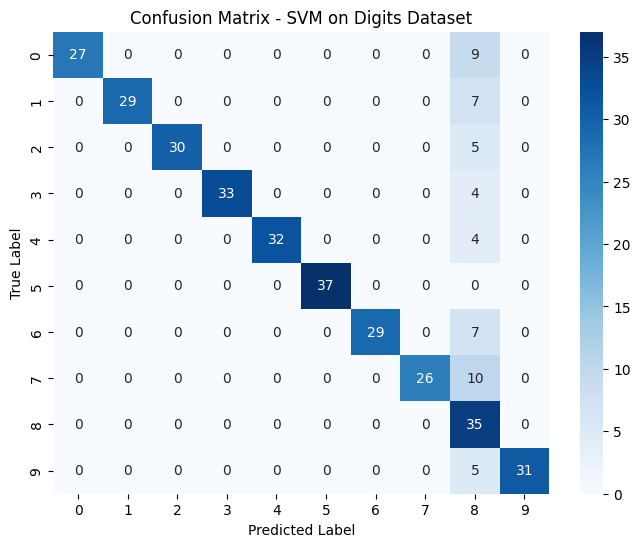

Total misclassified samples: 51


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

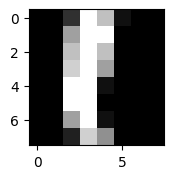

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

# Train best model (we'll use tuned params directly here for speed)
best_params = {'C': 10, 'gamma': 0.01}  # Example values, found by tuning loop
model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM on Digits Dataset")
plt.show()

# Find misclassified indices
misclassified = (y_test != y_pred)
misclassified_idx = [i for i, x in enumerate(misclassified) if x]

print(f"Total misclassified samples: {len(misclassified_idx)}")

# Plot some misclassified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:12]):  # show first 12 mistakes
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap="gray")
    plt.title(f"True: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    plt.axis("off")
plt.suptitle("Examples of Misclassified Digits")
plt.show()
